In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from pandas.tools.plotting import scatter_matrix


In [2]:
#data = pd.read_csv('student_vector.csv')
#data = pd.read_csv('student_vector_new.csv')
data = pd.read_csv('student_vector_new_29_10_2015.csv')

In [3]:
data.columns

Index(['PlaceholderID', 'gndr_flag', 'Ethnicity', 'first_gen',
       'graduated_category', 'pre-major class level', 'lower_math_count',
       'lower_math_dist_count', 'lower_math_course_attempt_ratio',
       'lower_math_avg', 'lower_math_std', 'upper_math_count',
       'upper_math_dist_count', 'upper_math_course_attempt_ratio',
       'upper_math_avg', 'upper_math_std', 'lower_physics_count',
       'lower_physics_dist_count', 'lower_physics_course_attempt_ratio',
       'lower_physics_avg', 'lower_physics_std', 'upper_physics_dist_count',
       'upper_physics_course_attempt_ratio', 'upper_physics_count',
       'upper_physics_avg', 'upper_physics_std'],
      dtype='object')

In [4]:
data['physics_true'] = [1 if x==3 else 0 for x in data['graduated_category']]

In [5]:
data.head()

,PlaceholderID,gndr_flag,Ethnicity,first_gen,graduated_category,pre-major class level,lower_math_count,lower_math_dist_count,lower_math_course_attempt_ratio,lower_math_avg,...,lower_physics_dist_count,lower_physics_course_attempt_ratio,lower_physics_avg,lower_physics_std,upper_physics_dist_count,upper_physics_course_attempt_ratio,upper_physics_count,upper_physics_avg,upper_physics_std,physics_true
0,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,0,7,0,1,1,8,5,0.625000,0.375000,...,4,0.800000,0.450000,0.287772,4,0.800000,1,0.375,0.000000,0
1,002E1739-81FA-467D-91A6-2318A00273E3,0,7,0,4,1,2,2,1.000000,0.562500,...,3,1.000000,0.833333,0.072169,3,1.000000,0,0.000,0.000000,0
2,004E919F-6AD9-4F34-B4DC-19328B9FBF1F,0,7,0,4,1,9,5,0.555556,0.347222,...,5,0.833333,0.562500,0.233854,5,0.833333,9,0.500,0.197642,0
3,0082B136-3401-4D35-AE45-494A67111358,0,7,0,4,3,0,0,0.000000,0.000000,...,1,1.000000,0.625000,0.000000,1,1.000000,0,0.000,0.000000,0
4,00A6E8CF-9302-4C7D-83BA-DC5DDA31E543,0,7,0,2,0,4,3,0.750000,0.531250,...,0,0.000000,0.000000,0.000000,0,0.000000,0,0.000,0.000000,0


In [6]:
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 0.75

In [7]:
train,test = data[data['is_train']==True], data[data['is_train']==False]

In [8]:
features = ['gndr_flag', 'Ethnicity', 'first_gen','pre-major class level',
            'lower_math_course_attempt_ratio', 'lower_physics_course_attempt_ratio',
       'lower_physics_avg','lower_math_avg']

In [9]:
features = ['gndr_flag', 'Ethnicity', 'first_gen',
        'pre-major class level',
       'lower_math_dist_count', 
       'lower_math_avg',  
       'lower_physics_dist_count', 
       'lower_physics_avg', ]

In [10]:
features = ['gndr_flag', 'Ethnicity', 'first_gen',
        'pre-major class level',
       'lower_math_dist_count',
       'lower_math_avg', 
       'lower_physics_dist_count', 
       'lower_physics_avg']

In [17]:
clf = RandomForestClassifier(n_jobs=-1)

In [18]:
feature_we_are_trying_to_predict = 'physics_true'
#feature_we_are_trying_to_predict = 'graduated_category'


In [19]:
y, blah = pd.factorize(train[feature_we_are_trying_to_predict])

In [20]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
prediction = clf.predict(test[features])

In [22]:
test_data = data[data['is_train']==False][feature_we_are_trying_to_predict]

In [23]:
score_data = (abs(prediction - test_data))

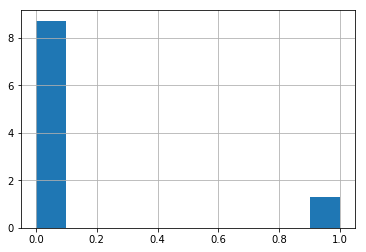

In [24]:
score_data.hist(normed=True)

In [25]:
clf.predict_proba(test[features])

array([[ 0.83333333,  0.16666667],
       [ 1.        ,  0.        ],
       [ 0.5       ,  0.5       ],
       ..., 
       [ 1.        ,  0.        ],
       [ 0.2       ,  0.8       ],
       [ 1.        ,  0.        ]])

In [26]:
clf.score(test[features],test[feature_we_are_trying_to_predict])

0.87145557655954631

In [27]:
feature_importance = sorted(zip(clf.feature_importances_, features))

In [28]:
feature_importance = pd.DataFrame(feature_importance)

In [29]:
feature_importance.columns = ['importance', 'feature']

In [30]:
feature_importance.index = feature_importance.feature

In [31]:
color=['red','blue','blue','blue','blue','blue','blue','blue']

In [32]:
feature_importance.max()[0]

0.3126935562863029

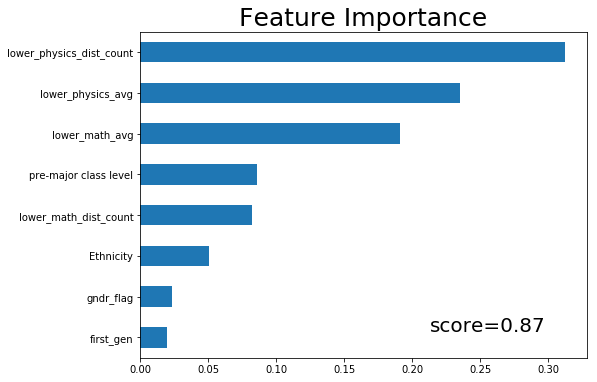

In [33]:
ax = feature_importance.plot(kind='barh', legend=False, figsize=((8,6)))
ax.set_ylabel('')
ax.set_title('Feature Importance', fontsize=25)
ax.text(feature_importance.max()[0]-0.1,0.15,s='score={s}'.format(s=round(clf.score(test[features],test[feature_we_are_trying_to_predict]),2))
       ,fontsize=20)

In [34]:
color = []
for d in data[feature_we_are_trying_to_predict]:
    if d==True:
        color.append('red')
    else:
        color.append('gray')

In [35]:
def add_jitter(df, jitter):
    """
    Adds jitter to a data set based on a random normal
    distribution.
    
    Requirements: numpy, pandas
    """
    return abs(df + np.random.normal(df, jitter, size=len(df)))

/home/mnky9800n/anaconda3/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94371d6f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f941d5b49b0>]], dtype=object)

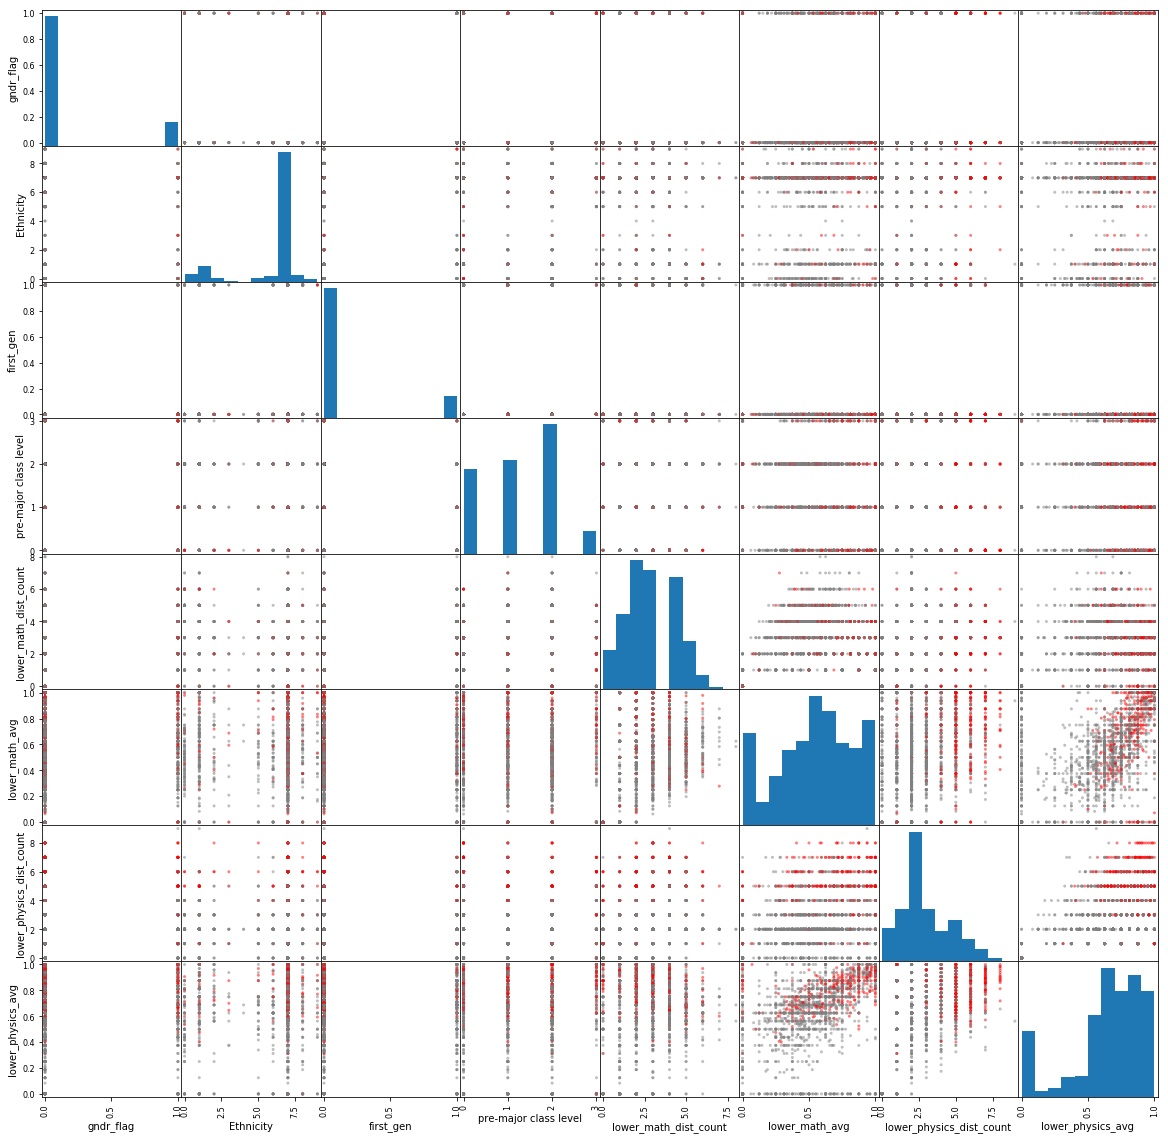

In [36]:
scatter_matrix(data[features], color=color, figsize=(20,20), alpha=0.5)